In [323]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import math
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from scipy import stats

In [324]:
final_features_df = pd.read_pickle("final_features_df")

In [325]:
final_features_df = final_features_df.convert_objects(convert_numeric=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [326]:
final_features_df = final_features_df[pd.notnull(final_features_df['wind_speed'])]
final_features_df = final_features_df[pd.notnull(final_features_df['temp'])]
final_features_df = final_features_df[pd.notnull(final_features_df['size_ha'])]
final_features_df = final_features_df[pd.notnull(final_features_df['month'])]
final_features_df = final_features_df[pd.notnull(final_features_df['burn_rate'])]
final_features_df = final_features_df.dropna()

In [327]:
final_features_df = final_features_df[final_features_df["wind_speed"] != -9999.9]
final_features_df = final_features_df[final_features_df["precipitation"] != -9999.9]
final_features_df = final_features_df[final_features_df["temp"] != -9999.9]
final_features_df = final_features_df[final_features_df["size_ha"] != -1]

In [328]:
final_features_df["wind_speed"] = final_features_df["wind_speed"].astype(np.float32)
final_features_df["temp"] = final_features_df["temp"].astype(np.float32)
final_features_df["size_ha"] = final_features_df["size_ha"].astype(np.float32)
final_features_df["month"] = final_features_df["month"].astype(np.float32)
final_features_df["precipitation"] = final_features_df["precipitation"].astype(np.float32)
final_features_df["burn_rate"] = final_features_df["burn_rate"].astype(np.float32)

In [329]:
final_features_df.dtypes

fire_id          float64
size_ha          float32
temp             float32
precipitation    float32
wind_speed       float32
month            float32
burn_rate        float32
dtype: object

In [330]:
final_features_df["temp"].mean()

2.6943023

In [331]:
final_features_df.head()

,fire_id,size_ha,temp,precipitation,wind_speed,month,burn_rate
131774,10011.0,294.000000,-20.200001,25.799999,14.1,0.0,1.0
131775,22004.0,245.339996,11.200000,52.299999,11.1,5.0,1.0
131780,45000.0,1036.000000,11.900000,76.300003,11.0,7.0,1.0
131781,62006.0,1024.699951,12.000000,68.400002,12.8,7.0,1.0
239734,1814.0,0.010000,4.800000,59.200001,13.5,8.0,1.0


In [332]:
final_features_df


,fire_id,size_ha,temp,precipitation,wind_speed,month,burn_rate
131774,10011.0,294.000000,-20.200001,25.799999,14.100000,0.0,1.0
131775,22004.0,245.339996,11.200000,52.299999,11.100000,5.0,1.0
131780,45000.0,1036.000000,11.900000,76.300003,11.000000,7.0,1.0
131781,62006.0,1024.699951,12.000000,68.400002,12.800000,7.0,1.0
239734,1814.0,0.010000,4.800000,59.200001,13.500000,8.0,1.0
239828,22.0,3968.000000,10.600000,36.900002,17.100000,8.0,2.0
239872,16.0,2429.100098,9.500000,36.900002,17.500000,8.0,1.0
239929,180.0,0.300000,18.100000,81.000000,10.800000,6.0,1.0
239965,181.0,0.000000,18.100000,81.000000,10.800000,6.0,1.0
239974,182.0,0.000000,18.100000,81.000000,10.800000,6.0,2.0


In [301]:
x = final_features_df
y = final_features_df["size_ha"]
del x["fire_id"]
del x["size_ha"]

In [315]:
wop = {'temp' : [3.8],
     'precipitation' : [54.468536],
     'wind_speed' : [13.301041],
     'month' : [2],
     'burn_rate' : [1],
    }
wp = {'temp' : [3.2],
     'precipitation' : [38.493721],
     'wind_speed' : [13.301041],
     'month' : [2],
     'burn_rate' : [1],
    }
reg = LinearRegression()
reg.fit(x, y)
reg.coef_
without_paris = reg.predict(pd.DataFrame(wop))
with_paris = reg.predict(pd.DataFrame(wp))
print("without paris: " + str(without_paris))
print("with paris: " + str(with_paris))

without paris: [-31137.43535283]
with paris: [-31443.40602949]


In [316]:
y.mean()

1222.3572

In [260]:
reg.score(x,y)

0.014644548741073017

In [292]:
without_paris.min()

-2647.7946735579053

In [310]:
x.head()

,temp,precipitation,wind_speed,month,burn_rate
131774,-20.200001,25.799999,14.1,0.0,1.0
131775,11.200000,52.299999,11.1,5.0,1.0
131780,11.900000,76.300003,11.0,7.0,1.0
131781,12.000000,68.400002,12.8,7.0,1.0
239734,4.800000,59.200001,13.5,8.0,1.0


In [294]:
y.mean()

1222.3572

linear regression:`

In [205]:
msk = np.random.rand(len(final_features_df)) < 0.8
train = final_features_df[msk]
test = final_features_df[~msk]

y = train["size_ha"]
#del train["size_ha"]
x = train

In [206]:
del x["fire_id"]
del x["size_ha"]

In [157]:
ty = test["size_ha"]
#del train["size_ha"]
tx = test

In [158]:
del tx["fire_id"]
del tx["size_ha"]

In [159]:
newx = x
del newx["month"]
del newx["burn_rate"]

In [160]:
tx.head()

,temp,precipitation,wind_speed,month,burn_rate
131774,-20.200001,25.799999,14.1,0.0,1.0
239990,18.100000,81.000000,10.8,6.0,1.0
240026,17.000000,55.599998,11.0,6.0,2.0
240057,18.100000,81.000000,10.8,6.0,1.0
240061,18.100000,81.000000,10.8,6.0,1.0


In [161]:
tx["wind_speed"].mean()

13.436116

In [162]:
y.head()

131775     245.339996
131780    1036.000000
131781    1024.699951
239734       0.010000
239828    3968.000000
Name: size_ha, dtype: float32

In [209]:
reg = LinearRegression()
reg.fit(x, y)
reg.coef_

array([  5.96655083e+01,  -2.13895988e+00,   1.69032574e+01,
         5.99071121e+01,  -2.74774561e+03])

In [210]:
predictedy = reg.predict(tx)

In [211]:
predictedy

array([  436.87315986,  2907.65352781,   151.98607307, ...,  -279.96254743,
         227.62628558,  -537.53071832])

In [166]:
y = ty.values

In [167]:
y

array([  2.94000000e+02,   5.00000000e-01,   0.00000000e+00, ...,
         1.00000000e+01,   1.00000001e-01,   1.00000001e-01], dtype=float32)

In [168]:
#there is no false positives with a continuous variable. we can't have a confusion matrix for a regression line. But we possibly can if we bucketize the variables. but what good does that do and what will it mean?
#confusion_matrix(ty,predictedy)

In [219]:
reg.score(x, y)

0.014644548741073017

In [170]:
nx

NameError: name 'nx' is not defined

In [171]:
import numpy as np
import statsmodels.api as sm

"""ny = y.values

nx = x.values"""
nx = nx.tolist()
ny = ny.tolist()

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

NameError: name 'nx' is not defined

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [172]:
LinearRegression(reg)

LinearRegression(copy_X=True,
         fit_intercept=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         n_jobs=1, normalize=False)

In [173]:
linregress(x,y)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

r value 0.955949031197
p_value 5.65761249232e-05
standard deviation 0.0831744517144


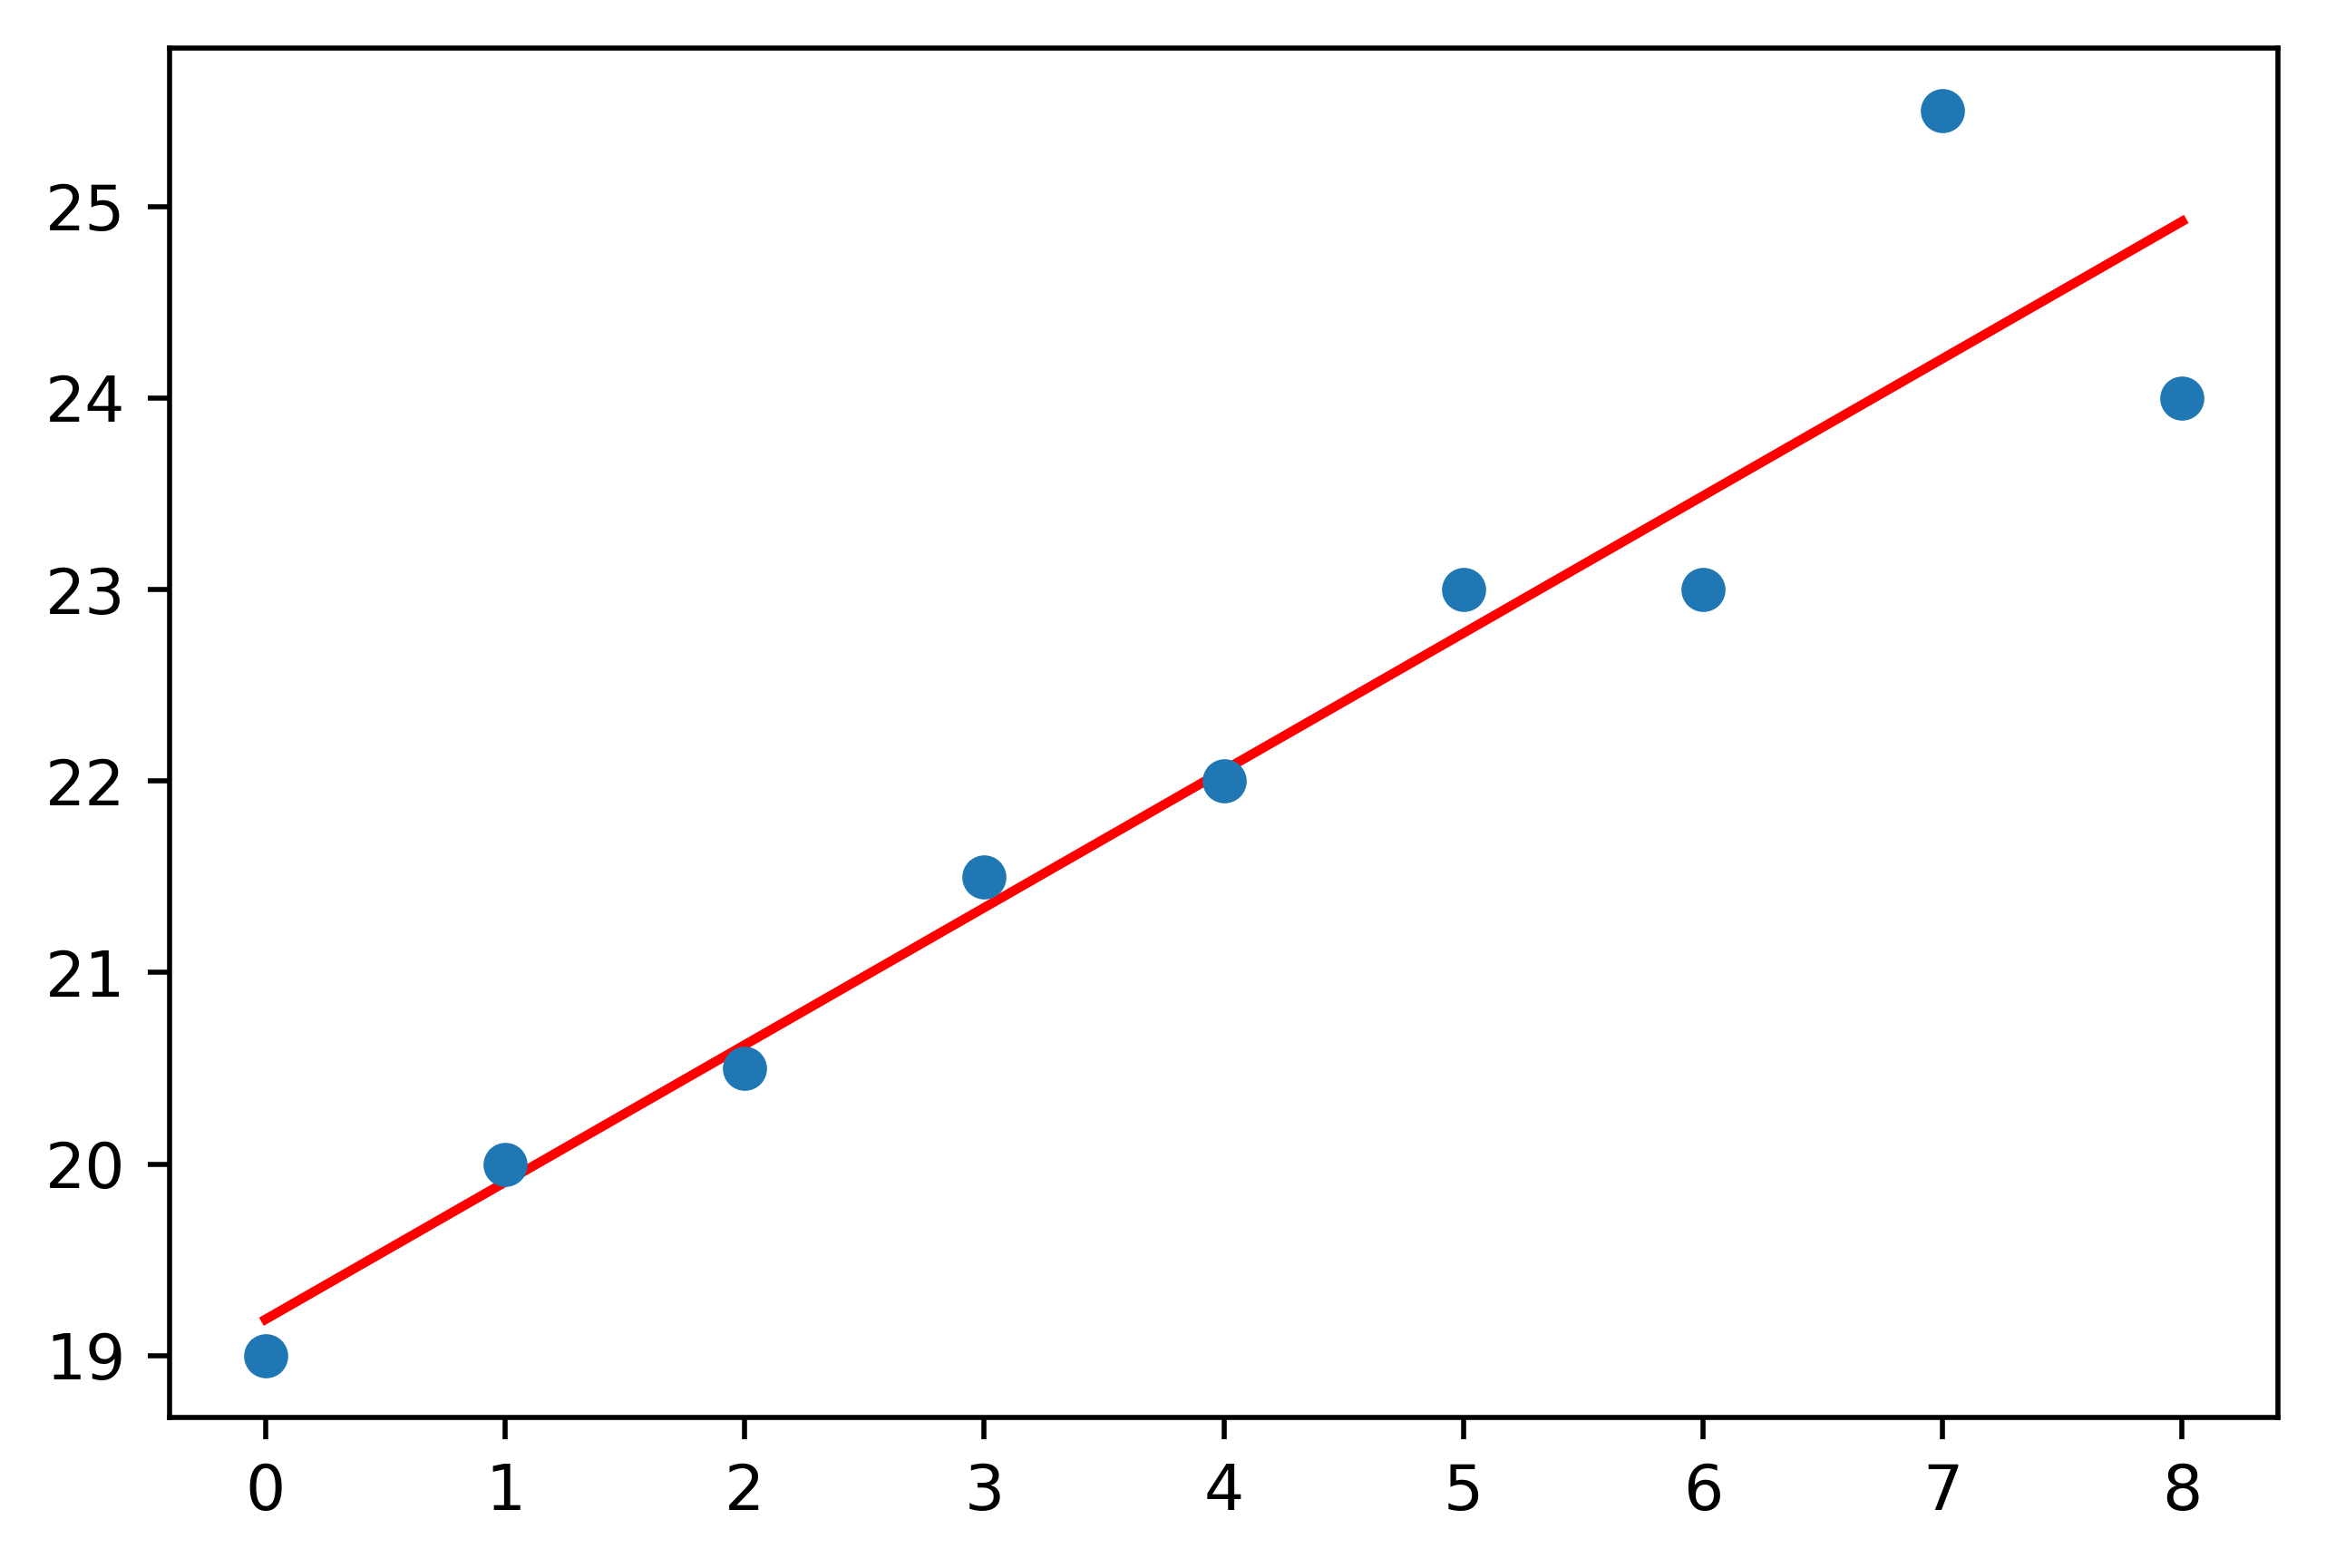

In [174]:
from numpy import arange,array,ones#,random,linalg
from pylab import plot,show
from scipy import stats

xi = arange(0,9)
A = array([ xi, ones(9)])
# linearly generated sequence
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

print('r value', r_value)
print('p_value', p_value)
print('standard deviation', std_err)

line = slope*xi+intercept
plot(xi,line,'r-',xi,y,'o')
show()

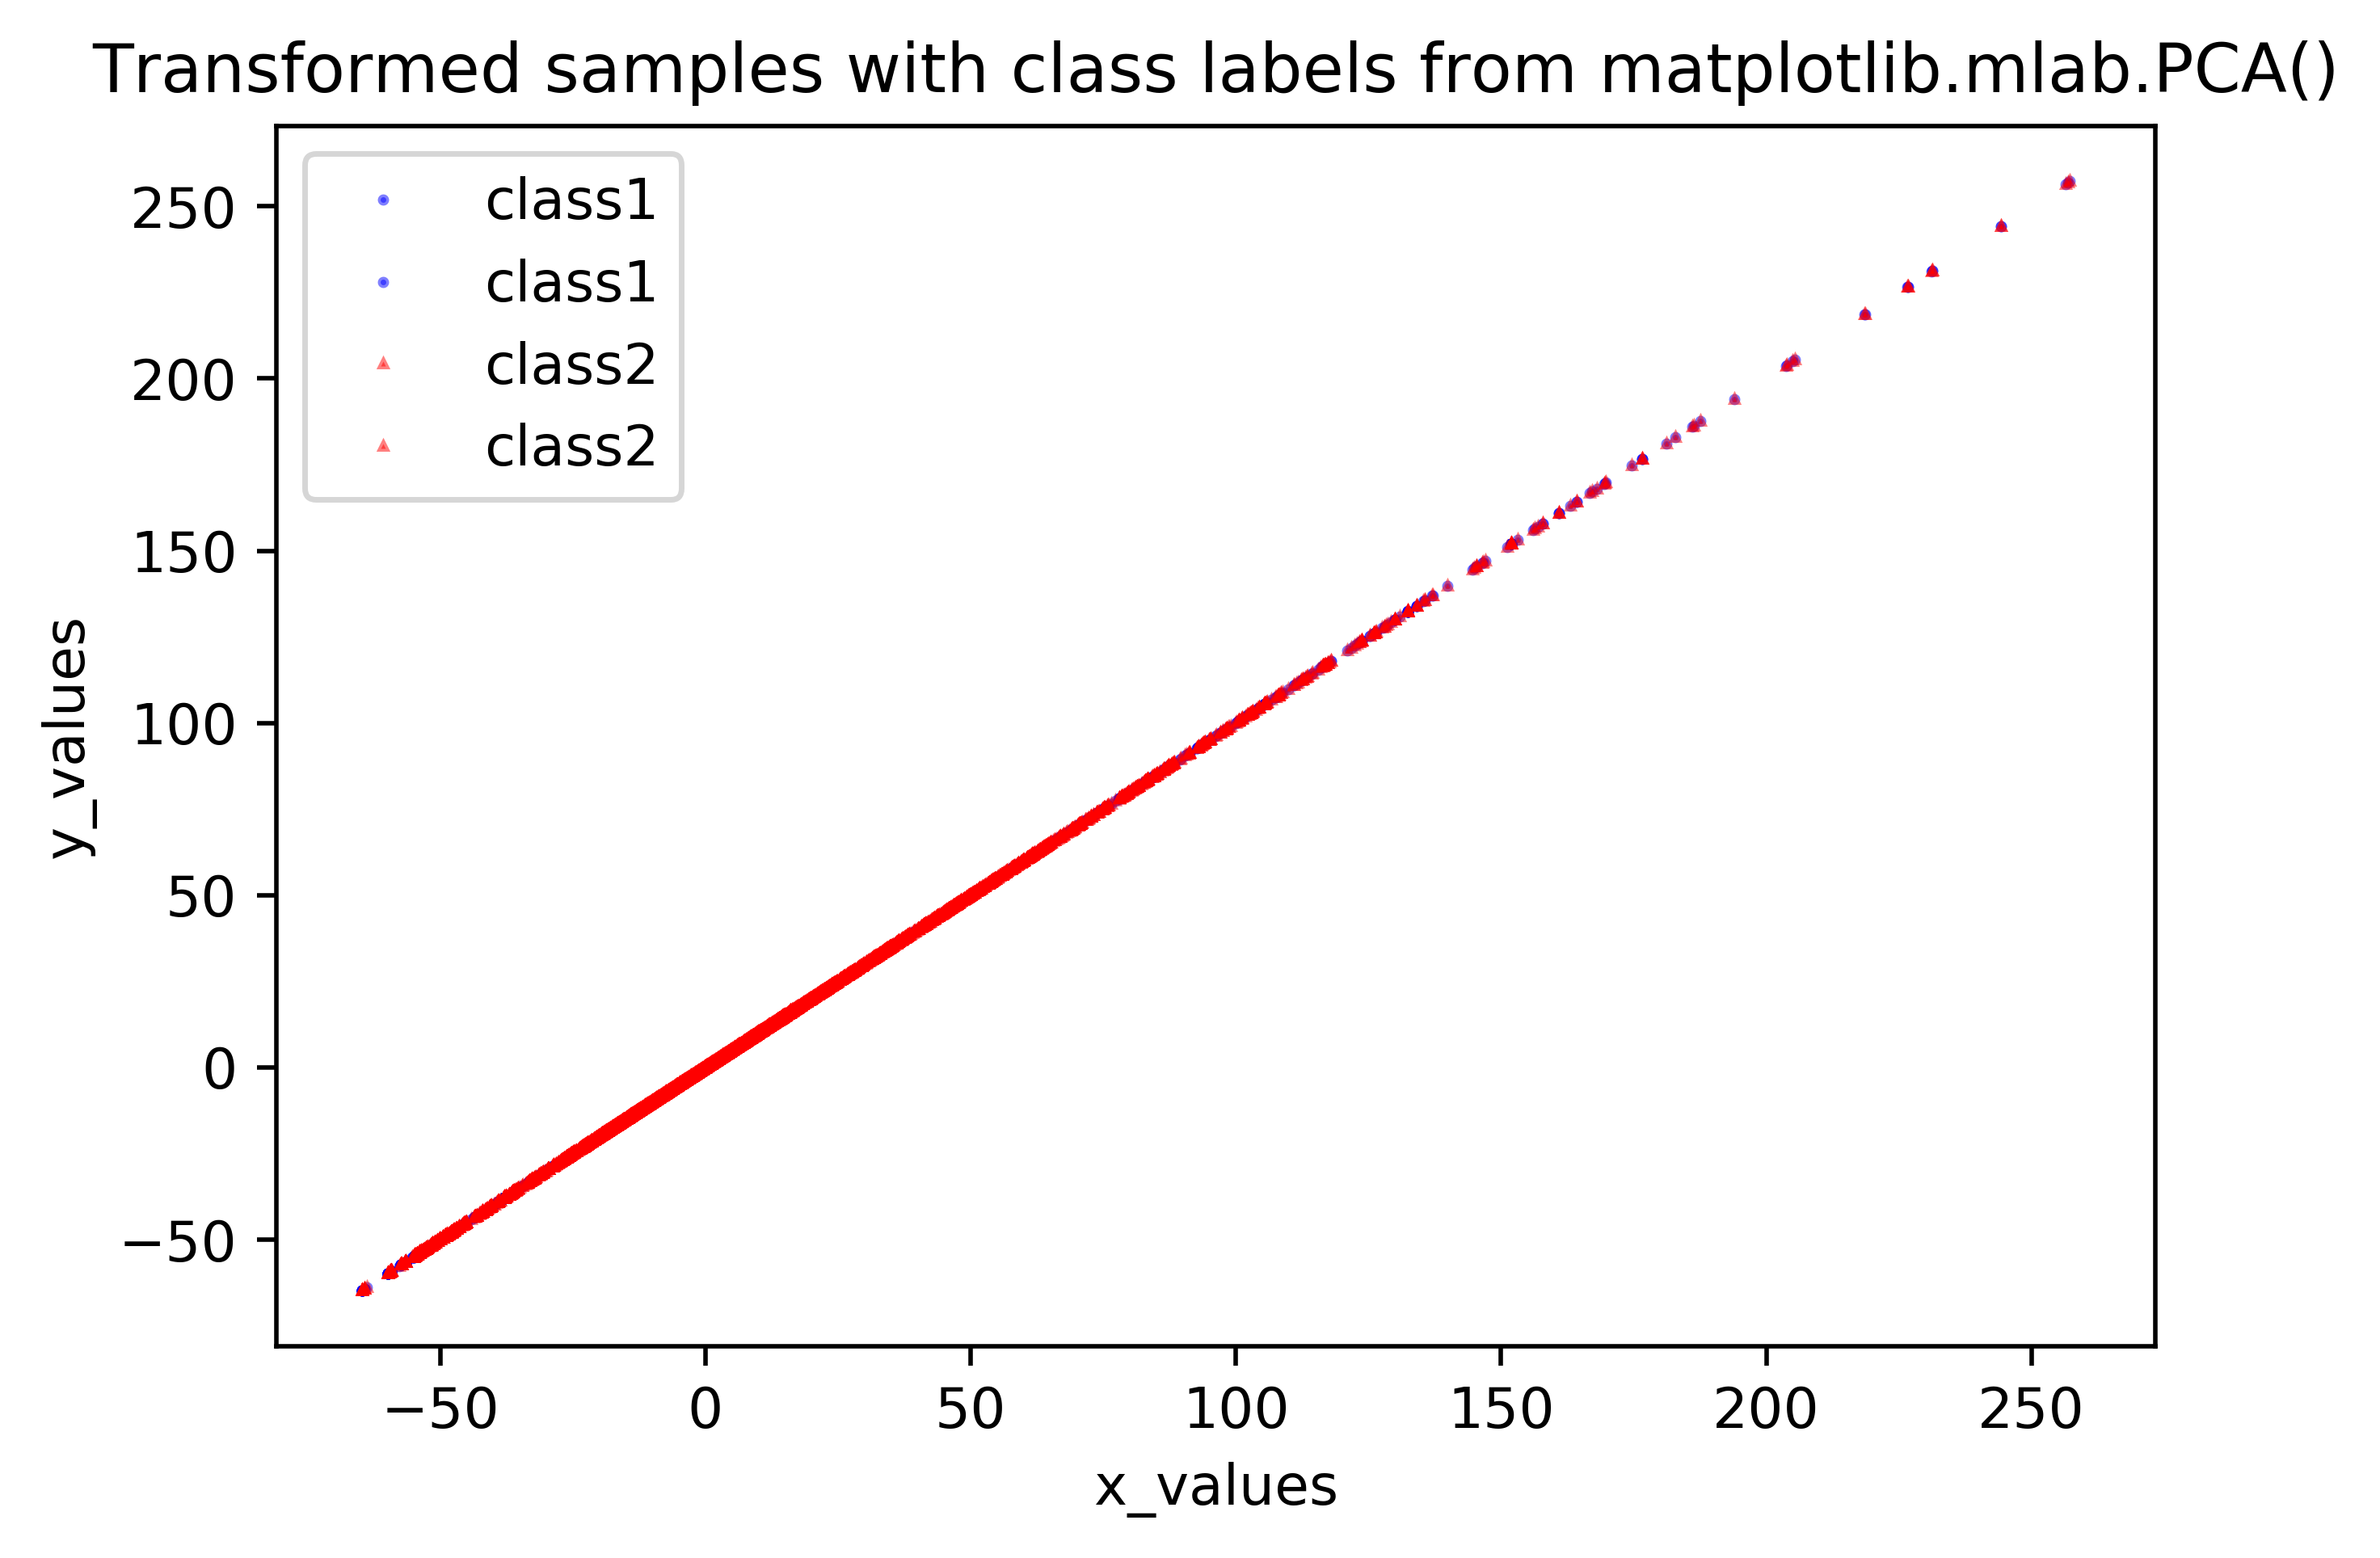

In [175]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(newx)

plt.plot(sklearn_transf,sklearn_transf, 'o', markersize=1, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf, sklearn_transf, '^', markersize=1, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()
plt.rcParams['savefig.dpi'] = 500

In [176]:
from sklearn.decomposition import PCA
reg = LinearRegression()
pca = PCA(n_components=1)
X_pca = pca.fit_transform(x)

reg.fit(X_pca,y)

ValueError: Found input variables with inconsistent numbers of samples: [5142, 9]

In [177]:
reg.predict(tx)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [178]:
X_pca
#x1 = X_pca[0:,0]
#x2 = X_pca[0:,1]

array([[  -8.39211898],
       [  15.19694954],
       [   7.49428477],
       ..., 
       [  65.82072564],
       [ 132.41897677],
       [ 132.41897677]])

In [179]:
X_pca.min()

-64.781281960641877

In [180]:
new_pca = []
for x in X_pca:
    new_pca.append(x[0]+64.766534089352405)

In [181]:
new_pca

[56.374415113205771,
 79.963483631351892,
 72.260818856841752,
 61.724117980531254,
 41.1754436360591,
 40.936820281578491,
 85.887931515836499,
 85.887931515836499,
 85.887931515836499,
 80.94217421113548,
 85.887931515836499,
 85.887931515836499,
 85.887931515836499,
 85.887931515836499,
 97.571253210930507,
 28.733760635596973,
 28.733760635596973,
 28.733760635596973,
 122.26958554815269,
 36.070553620278929,
 51.88212272165363,
 36.065972207571761,
 26.022128150809223,
 118.48430884769957,
 32.520629143272224,
 79.017767977131754,
 98.451342138627851,
 71.264905784278213,
 149.92025310145775,
 52.749576539247059,
 85.385902146550535,
 36.065972207571761,
 36.070553620278929,
 90.899895844237932,
 36.070553620278929,
 90.899895844237932,
 39.312688589712948,
 53.890360235156784,
 127.79621287517318,
 92.346234343086138,
 126.13063962559298,
 94.001045968670127,
 118.70860766688105,
 118.70860766688105,
 118.70860766688105,
 142.05332173143358,
 118.72286095301654,
 118.708607666881

In [182]:
plt.scatter(new_pca, y, s=1)
plt.plot(new_pca, reg.predict(X_pca))
plt.show()

ValueError: x and y must be the same size

In [183]:
from numpy import arange,array,ones#,random,linalg
from pylab import plot,show
from scipy import stats
from sklearn.svm import SVR


"""
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')"""





#A = array([ bx, ones(9)])
# linearly generated sequence



#y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

slope, intercept, r_value, p_value, std_err = stats.linregress(new_pca,y)

print('r value', r_value)
print('p_value', p_value)
print('standard deviation', std_err)
xi = np.arange(-50,270)
line = slope*xi+intercept
print(slope*line+intercept)
#plot(bx,y,'o',s=1)
plt.ylabel('Hectare')
plt.xlabel('Principal Components')
plt.title('Climate Conditions and Area Burned')
plt.scatter(new_pca,y,s=1)
plot(line,c="red")
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [184]:
d = {'temp' : [5.8],
     'precipitation' : [54.468536],
     'wind_speed' : [13.301041],
     'month' : [2],
     'burn_rate' : [1],
    }
without_paris = pd.DataFrame(d)
#climate_data = pd.DataFrame([5.8],[54.468536], [13.301041], [2], [1], columns=['temp', 'precipitation', 'wind_speed', 'month', 'burn_rate'])

In [185]:
without_paris

,burn_rate,month,precipitation,temp,wind_speed
0,1,2,54.468536,5.8,13.301041


In [186]:
reg = LinearRegression()
pca = PCA(n_components=1)
without_paris_pca = pca.fit_transform(without_paris)

/usr/local/lib/python3.5/dist-packages/sklearn/decomposition/pca.py:398: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [187]:
without_paris_pca

array([[ 0.]])

In [188]:
from scipy.optimize import curve_fit
#def func(x, a, b, c):
#    return a * np.exp(-b * x) + c
xdata = np.linspace(0, 4, 50)
#y = func(xdata, 2.5, 1.3, 0.5)
popt, pcov = curve_fit(func, bx, y)

#ydata = y + 0.2 * np.random.normal(size=len(xdata))b = y + 0.2 * np.random.normal(size=len(xdata))

NameError: name 'func' is not defined

In [189]:
pcov

NameError: name 'pcov' is not defined

In [190]:
def func(yx, p1, p2):
  return p1*np.cos(p2*yx).astype(int) + p2*np.sin(p1*yx).astype(int)
p1 = popt[0]
p2 = popt[1]
nbx = np.array(bx)
ny = np.array(y)

residuals = y - func(bx,p1,p2)
fres = sum(residuals**2)

NameError: name 'popt' is not defined

In [191]:
bx

NameError: name 'bx' is not defined

In [192]:
bx = []
for p in X_pca:
    bx.append(p[0])

In [193]:
y = y.tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [194]:


bx[:5]

[-8.3921189761466337,
 15.196949541999485,
 7.4942847674893525,
 -3.0424161088211488,
 -23.591090453293301]

In [195]:
y

[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

In [196]:
x.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'